In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [59]:
data = pd.read_csv('E:\Mat_Work\machine-learning-ex2\ex2\ex2data1.txt',header=None)
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


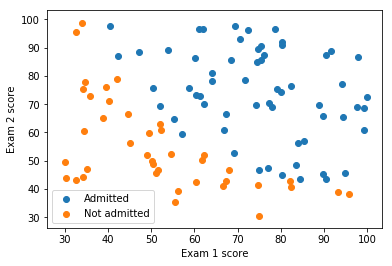

In [60]:
mask = y==1
adm = plt.scatter(X[mask][0],X[mask][1])
not_adm = plt.scatter(X[~mask][0],X[~mask][1])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [61]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [62]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [63]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [64]:
(m,n) = X.shape
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]
theta = np.zeros((n+1,1))

J = costFunction(theta, X, y)
print(J)

0.6931471805599453


In [65]:
temp = opt.fmin_tnc(func=costFunction,x0=theta.flatten(),fprime=gradient,args=(X,y.flatten()))
theta_optimized = temp[0]
print(theta_optimized)

[-25.1613186    0.20623159   0.20147149]


In [68]:
J = costFunction(theta_optimized[:,np.newaxis],X,y)
print(J)

0.20349770158947475


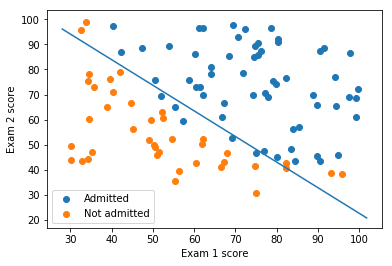

In [74]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,1]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [93]:
def accuracy(X,y,theta,cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)

accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)